# Importing the data

In [1]:
import sys
import os
import numpy as np
import pandas as pd
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
from pathlib import Path
dataset_path = os.path.join("Datasets")
dataset_fname = "penguins_train_set.csv"
cols = ["Species","Island","Bill_length","Bill_depth","flipper_length","body_mass","sex","year"]
penguin_data = pd.read_csv(os.path.join(dataset_path, dataset_fname), names=cols, skiprows=1)

In [2]:
penguin_data

,Species,Island,Bill_length,Bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Cleaning the data

In [3]:
penguin_data["Bill_length"] = pd.to_numeric(penguin_data["Bill_length"])
penguin_data["Bill_depth"] = pd.to_numeric(penguin_data["Bill_depth"])
penguin_data["flipper_length"] = pd.to_numeric(penguin_data["flipper_length"])
penguin_data["body_mass"] = pd.to_numeric(penguin_data["body_mass"])
penguin_data["year"] = pd.to_numeric(penguin_data["year"])

In [4]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         344 non-null    object 
 1   Island          344 non-null    object 
 2   Bill_length     342 non-null    float64
 3   Bill_depth      342 non-null    float64
 4   flipper_length  342 non-null    float64
 5   body_mass       342 non-null    float64
 6   sex             333 non-null    object 
 7   year            344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
penguin_data = penguin_data.replace('Adelie', 0)
penguin_data = penguin_data.replace('Gentoo', 1)
penguin_data = penguin_data.replace('Chinstrap', 2)
penguin_data

,Species,Island,Bill_length,Bill_depth,flipper_length,body_mass,sex,year
0,0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,0,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,0,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,0,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,0,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,2,Dream,55.8,19.8,207.0,4000.0,male,2009
340,2,Dream,43.5,18.1,202.0,3400.0,female,2009
341,2,Dream,49.6,18.2,193.0,3775.0,male,2009
342,2,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
penguin_data['Bill_length'] = penguin_data['Bill_length'].fillna(penguin_data['Bill_length'].median())
penguin_data['Bill_depth'] = penguin_data['Bill_depth'].fillna(penguin_data['Bill_depth'].median())
penguin_data['flipper_length'] = penguin_data['flipper_length'].fillna(penguin_data['flipper_length'].median())
penguin_data['body_mass'] = penguin_data['body_mass'].fillna(penguin_data['body_mass'].median())
X = penguin_data[["Bill_length", "Bill_depth"]].values
y = penguin_data["Species"].values  # Iris virginica

In [7]:
X

array([[39.1 , 18.7 ],
       [39.5 , 17.4 ],
       [40.3 , 18.  ],
       [44.45, 17.3 ],
       [36.7 , 19.3 ],
       [39.3 , 20.6 ],
       [38.9 , 17.8 ],
       [39.2 , 19.6 ],
       [34.1 , 18.1 ],
       [42.  , 20.2 ],
       [37.8 , 17.1 ],
       [37.8 , 17.3 ],
       [41.1 , 17.6 ],
       [38.6 , 21.2 ],
       [34.6 , 21.1 ],
       [36.6 , 17.8 ],
       [38.7 , 19.  ],
       [42.5 , 20.7 ],
       [34.4 , 18.4 ],
       [46.  , 21.5 ],
       [37.8 , 18.3 ],
       [37.7 , 18.7 ],
       [35.9 , 19.2 ],
       [38.2 , 18.1 ],
       [38.8 , 17.2 ],
       [35.3 , 18.9 ],
       [40.6 , 18.6 ],
       [40.5 , 17.9 ],
       [37.9 , 18.6 ],
       [40.5 , 18.9 ],
       [39.5 , 16.7 ],
       [37.2 , 18.1 ],
       [39.5 , 17.8 ],
       [40.9 , 18.9 ],
       [36.4 , 17.  ],
       [39.2 , 21.1 ],
       [38.8 , 20.  ],
       [42.2 , 18.5 ],
       [37.6 , 19.3 ],
       [39.8 , 19.1 ],
       [36.5 , 18.  ],
       [40.8 , 18.4 ],
       [36.  , 18.5 ],
       [44.

In [8]:
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets


In [10]:
type_of_penguin = (y == 0) | (y == 1) | (y == 2)
X = X[type_of_penguin]
y = y[type_of_penguin]

In [51]:
svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(X, y)

SVC(C=0.1, kernel='linear')

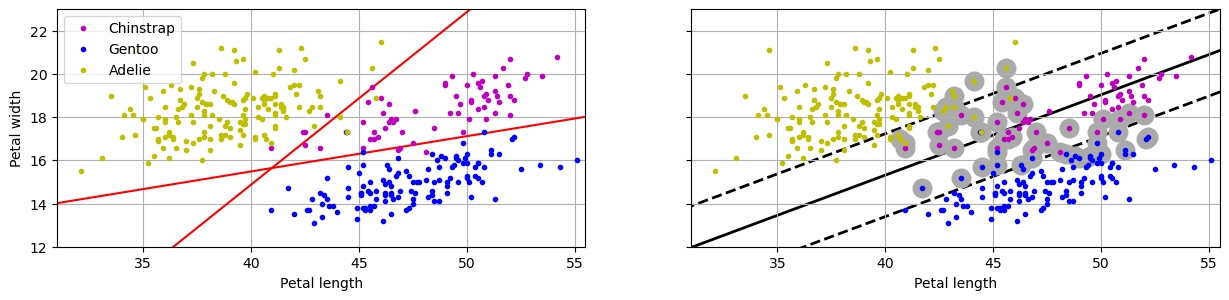

In [52]:
w1 = svm_clf.coef_[0]           # w consists of 2 elements
b1 = svm_clf.intercept_[0]      # b consists of 1 element
w2 = svm_clf.coef_[1]           # w consists of 2 elements
b2 = svm_clf.intercept_[1]      # b consists of 1 element
w3 = svm_clf.coef_[2]           # w consists of 2 elements
b3 = svm_clf.intercept_[2]      # b consists of 1 element
# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
def plot_lines(w, b):
    x_points = np.linspace(-1,100)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
    plt.plot(x_points, y_points, c='r');
    
def plot_svc_decision_boundary(w, b, svm_clf, xmin, xmax):
    x_points = np.linspace(-1,100)    # generating x-points from -1 to 1
    decision_boundary = (-w[0] / w[1]) * x_points - b / w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin + 0.5
    gutter_down = decision_boundary - margin - 0.5
    svs = svm_clf.support_vectors_
    plt.plot(x_points, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x_points, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x_points, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(15, 8), sharey=True)

plt.sca(axes[0])
plot_lines(w2, b2)
plot_lines(w3, b3)
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "m.", label="Chinstrap")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.", label="Gentoo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.", label="Adelie")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([31, 55.5, 12, 23])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(w1, b1, svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "m.",)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.")
plt.xlabel("Petal length")
plt.axis([31, 55.5, 12, 23])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

In [54]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm_clf, X, y).mean()

0.9534100596760444

# Polynomial 

In [14]:
X = penguin_data[["Bill_length", "Bill_depth"]].values
y = penguin_data["Species"].values  # Iris virginica

from sklearn.svm import SVC
import pylab as pl

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [15]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "m.",)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
def plot_predictions(clf, axes, ti):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0s = np.linspace(x_min, x_max, 100)
    x1s = np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(x0s, x1s)
    plt.subplot(1, 1, 1)
    X_ = np.c_[xx.ravel(), yy.ravel()]
    z = clf.predict(X_)
    z = z.reshape(xx.shape)
    ##y_decision = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "m.",)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.contourf(xx, yy, z, cmap=plt.cm.cividis)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.xlim(xx.min(), xx.max())
    plt.title(ti)
    plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(), {'kernel':("poly"), 'degree':(3), 'coef0':(1), 'C':(5)})
clf.fit(X, y)

TypeError: Parameter grid for parameter 'kernel' needs to be a list or a numpy array, but got 'poly' (of type str) instead. Single values need to be wrapped in a list with one element.

In [ ]:
sorted(clf.cv_results_.keys())

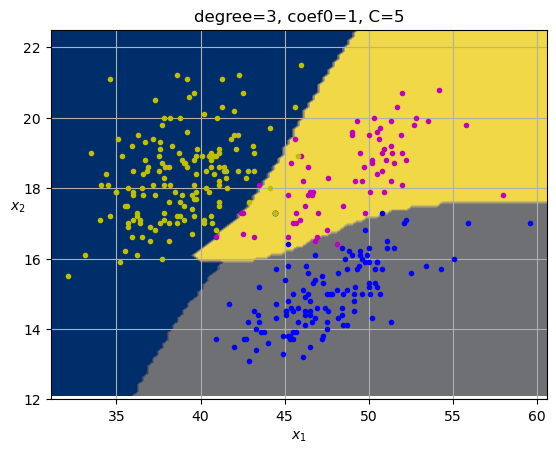

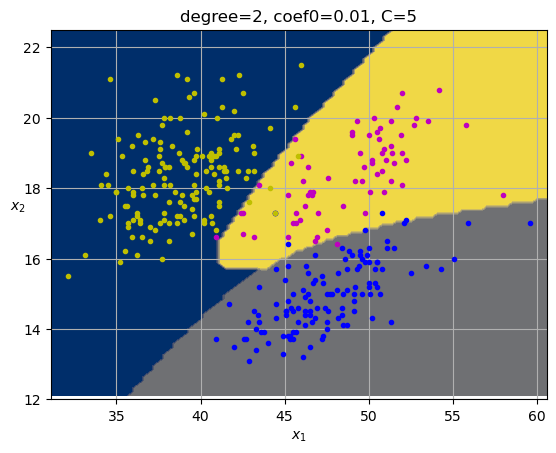

In [42]:
# extra code – this cell generates and saves Figure 5–7
poly10_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=2, coef0=0.01, C=5)
)
poly10_kernel_svm_clf.fit(X, y)

plot_predictions(poly_kernel_svm_clf, [31, 55.5, 12, 22.5], "degree=3, coef0=1, C=5")
plot_predictions(poly10_kernel_svm_clf, [31, 55.5, 12, 22.5], "degree=2, coef0=0.01, C=5")

In [43]:
from sklearn.model_selection import cross_val_score

cross_val_score(poly_kernel_svm_clf, X, y).mean()

0.9592497868712704

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(poly10_kernel_svm_clf, X, y).mean()

0.9651321398124468